<h1> Airlines Satisfaction analysis </h1>

### Table of Contents 
* [Goals](#goals)
* [Data](#Data)

 <h3> Goals </h3> <a class="anchor" id="Goals"></a>

In this notebook a customer satisfaction analysis on an airline will be done. The questions of this project are the following:

* Which are the factors that increase customer satisfaction?
* Are there factors that affect the satisfaction more than others?



<h3> Data </h3> <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:
<br> https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction </br>
    

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from tkinter import * 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_columns', None)
import missingno as msno
import scipy.stats as st 
import plotly.express as px

In [2]:
# Let's start by importing the dataset 
df= pd.read_csv('Invistico_Airline.csv')

Only the Arrival Delay in Minutes contains 0 values in this case 393 values.

<AxesSubplot: >

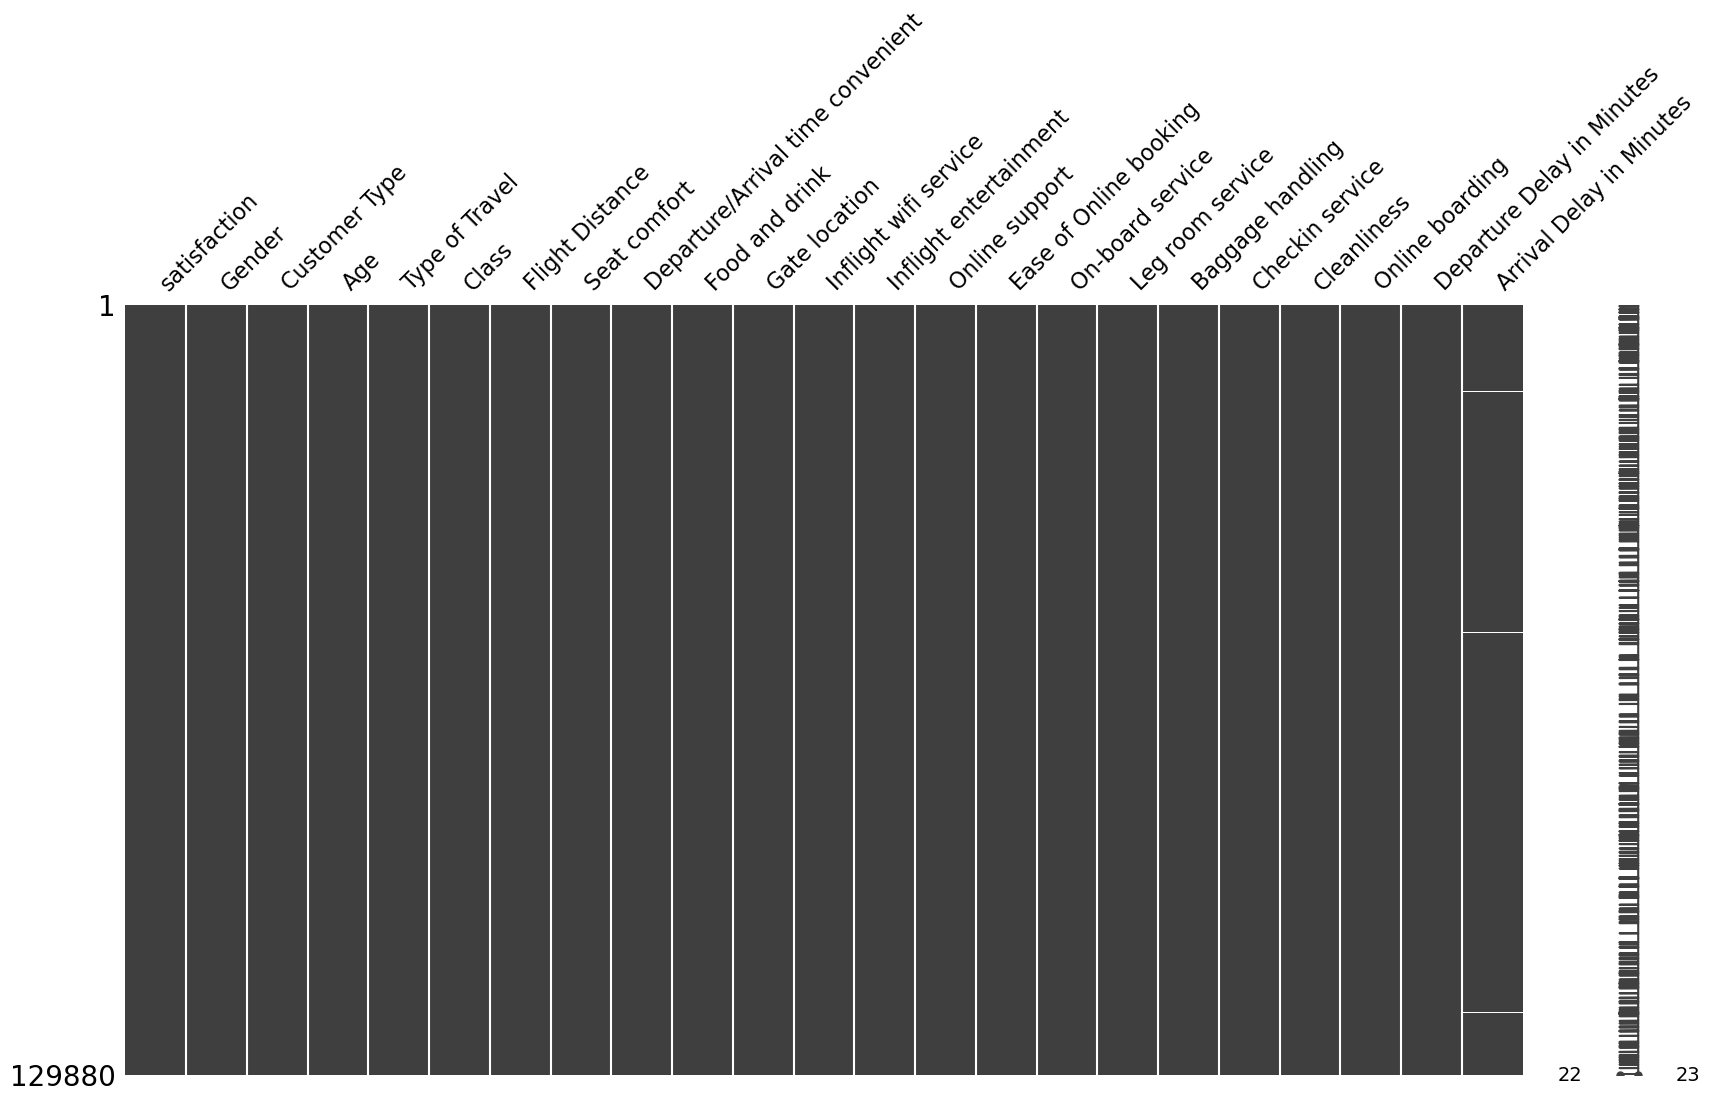

In [3]:
# Let's plot the graphic of the missing values to visualize it in a better way:
import missingno
missingno.matrix(df, figsize = (20,10))

<h2> Exploratory Data Analysis </h2>

<h3> Initial Data Inspection </h3>

In [4]:
# Now let's take a look at the first 5 rows
df.head(5)

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  \
0                       4               2                       3   
1                       2               2                       3   
2                       0               2                       2   
3                       4               3                       1   
4                       3               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0

<h3> Data Information </h3>

* How many (non-null) observations do we have?
* How many unique columns / features do we have?
* Which columns (if any) contain missing data?
* What is the data type of each column?

In [5]:
#We can see the dataset has many columns but let's take a closer look at what are those:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
df.describe(include='all')

satisfaction  Gender   Customer Type            Age   Type of Travel  \
count        129880  129880          129880  129880.000000           129880   
unique            2       2               2            NaN                2   
top       satisfied  Female  Loyal Customer            NaN  Business travel   
freq          71087   65899          106100            NaN            89693   
mean            NaN     NaN             NaN      39.427957              NaN   
std             NaN     NaN             NaN      15.119360              NaN   
min             NaN     NaN             NaN       7.000000              NaN   
25%             NaN     NaN             NaN      27.000000              NaN   
50%             NaN     NaN             NaN      40.000000              NaN   
75%             NaN     NaN             NaN      51.000000              NaN   
max             NaN     NaN             NaN      85.000000              NaN   

           Class  Flight Distance   Seat comfort  \
count     129880    129880.000000  129880.000000   
unique         3              NaN            NaN   
top     Business              NaN            NaN   
freq       62160              NaN            NaN   
mean         NaN      1981.409055       2.838597   
std          NaN      1027.115606       1.392983   
min          NaN        50.000000       0.000000   
25%          NaN      1359.000000       2.000000   
50%          NaN      1925.000000       3.000000   
75%          NaN      2544.000000       4.000000   
max          NaN      6951.000000       5.000000   

        Departure/Arrival time convenient  Food and drink  Gate location  \
count                       129880.000000   129880.000000  129880.000000   
unique                                NaN             NaN            NaN   
top                                   NaN             NaN            NaN   
freq                                  NaN             NaN            NaN   
mean                             2.990645        2.851994       2.990422   
std                              1.527224        1.443729       1.305970   
min                              0.000000        0.000000       0.000000   
25%                              2.000000        2.000000       2.000000   
50%                              3.000000        3.000000       3.000000   
75%                              4.000000        4.000000       4.000000   
max                              5.000000        5.000000       5.000000   

        Inflight wifi service  Inflight entertainment  Online support  \
count           129880.000000           129880.000000   129880.000000   
unique                    NaN                     NaN             NaN   
top                       NaN                     NaN             NaN   
freq                      NaN                     NaN             NaN   
mean                 3.249130                3.383477        3.519703   
std                  1.318818                1.346059        1.306511   
min                  0.000000                0.000000        0.000000   
25%                  2.000000                2.000000        3.000000   
50%                  3.000000                4.000000        4.000000   
75%                  4.000000                4.000000        5.000000   
max                  5.000000                5.000000        5.000000   

        Ease of Online booking  On-board service  Leg room service  \
count            129880.000000     129880.000000     129880.000000   
unique                     NaN               NaN               NaN   
top                        NaN               NaN               NaN   
freq                       NaN               NaN               NaN   
mean                  3.472105          3.465075          3.485902   
std                   1.305560          1.270836          1.292226   
min                   0.000000          0.000000          0.000000   
25%                   2.000000          3.000000          2.000000   
50%          

In [7]:
print(df.shape)
print(df.info())

(129880, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service     

The Dataset contains 23 columns and 129880 rows in the dataset, from which 1 is a float (Arrival Delay in Minutes) 17 are int columns and 5 are objects.

From the Kaggle dataset description we see that these columns represent:

* satisfaction: if the customer is satisfied or disatisfied with the arline service.
* Gender: the gender of the person (m/f).
* Customer Type: if the person is a loyal or disloyal customer.
* Age: the age of the customer.
* Type of Travel: if the travel was a personal or a business travel.
* Class: if the trip was done in Business, Economic or another class.
* Flight Distance: the number of miles the customer traveled on that trip.
* Seat comfort: the perceived seat's comfort measured from 0 to 5.
* Departure/Arrival time convenient: perception of the departure, or arrival time from 0 to 5.
* Food and drink: food and drink services measured from 0 to 5. 
* Gate location: perception of the gate's location from 0 to 5.
* Inflight wifi service: perception of the wifi experience during the flight from 0 to 5.
* Inflight entertainment: perception of the inflight entertainment from 0 to 5.
* Online support: perception of the online support from 0 to 5.
* Ease of Online booking: how easy was for the customer to book his flight from 0 to 5.
* On-board service: perception of onboarding service from 0 to 5.
* Leg room service: satisfaction with the leg room space from 0 to 5.
* Baggage handling: handling of the baggage from 0 to 5.
* Checkin service: service perception during the checkin from 0 to 5.
* Cleanliness: cleanliness perception during the flight experience from 0 to 5. 
* Online Boarding: perception of easiness of online boarding from 0 to 5.
* Departure Delay in Minutes: number of delay's minutes from the expected departure time.
* Arrival Delay in Minutes: number of delay's minutes from the expeccted arrival time. 



* numerical features: Age, Flight Distance, Seat Comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding, Departure Delay in Minutes, Arrival Delay in Minutes.

* categorical features: satisfaction, Gender, Customer Type, Type of Travel, Class 

<h3> Inspecting Missing Data </h3> 

In [7]:
df[df.isnull().any(axis=1)]

satisfaction  Gender      Customer Type  Age   Type of Travel  \
145        satisfied  Female     Loyal Customer   21  Personal Travel   
246        satisfied    Male     Loyal Customer   28  Personal Travel   
710        satisfied    Male     Loyal Customer   28  Personal Travel   
736        satisfied    Male     Loyal Customer    9  Personal Travel   
818     dissatisfied    Male     Loyal Customer    9  Personal Travel   
...              ...     ...                ...  ...              ...   
127739     satisfied    Male     Loyal Customer   44  Business travel   
128131     satisfied    Male     Loyal Customer   39  Business travel   
128710     satisfied  Female     Loyal Customer   45  Business travel   
129774     satisfied    Male  disloyal Customer   49  Personal Travel   
129873     satisfied  Female  disloyal Customer   63  Personal Travel   

           Class  Flight Distance  Seat comfort  \
145          Eco             4804             0   
246          Eco             1364             0   
710          Eco             1792             0   
736          Eco             1862             0   
818          Eco             1668             1   
...          ...              ...           ...   
127739  Business             3431             2   
128131  Business             1595             4   
128710       Eco              871             5   
129774       Eco             1594             5   
129873       Eco             1942             5   

        Departure/Arrival time convenient  Food and drink  Gate location  \
145                                     2               0              4   
246                                     3               0              4   
710                                     5               0              3   
736                                     5               0              4   
818                                     0               1              1   
...                                   ...             ...            ...   
127739                                  2               3              2   
128131                                  4               4              4   
128710                                  1               1              1   
129774                                  4               5              2   
129873                                  5               4              4   

        Inflight wifi service  Inflight entertainment  Online support  \
145                         5                       0               5   
246                         2                       0               4   
710                         5                       0               5   
736                         3                       0               3   
818                         4                       1               4   
...                       ...                     ...             ...   
127739                      2                       2               4   
128131                      2                       4               5   
128710                      5                       5               2   
129774                      3                       5               3   
129873                      3                       4               3   

        Ease of Online booking  On-board service  Leg room service  \
145                          5                 4                 1   
246                          2                 1                 1   
710                          5                 4                 4   
736                          3                 5                 3   
818                          4                 4                 5   
...                        ...               ...               ...   
127739                       5                 5                 5   
128131                       5                 5                 5   
128710                       5                 5                 5   
129774                      

In [8]:
#Let's obtain the missing values from each column: 
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [16]:
df.shape

(129880, 23)

In [9]:
#another form of obtaining missing values with a function 
def find_missing_values(df, columns) :
    missing_vals = {}
    print("Number of missing of NaN values for each column: ")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
    return missing_vals
missing_values= find_missing_values(df, columns = df.columns)
missing_values

Number of missing of NaN values for each column: 


{'satisfaction': 0,
 'Gender': 0,
 'Customer Type': 0,
 'Age': 0,
 'Type of Travel': 0,
 'Class': 0,
 'Flight Distance': 0,
 'Seat comfort': 0,
 'Departure/Arrival time convenient': 0,
 'Food and drink': 0,
 'Gate location': 0,
 'Inflight wifi service': 0,
 'Inflight entertainment': 0,
 'Online support': 0,
 'Ease of Online booking': 0,
 'On-board service': 0,
 'Leg room service': 0,
 'Baggage handling': 0,
 'Checkin service': 0,
 'Cleanliness': 0,
 'Online boarding': 0,
 'Departure Delay in Minutes': 0,
 'Arrival Delay in Minutes': 393}

In [10]:
#Let's check the most frequent value for every column: 
modes=[]
for col in df.columns:
    top_values=[]
    top_values=df[col].mode()
    modes.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
    pd.concat(modes, axis=1)
modes
   

[  satisfaction
 0    satisfied,
    Gender
 0  Female,
     Customer Type
 0  Loyal Customer,
    Age
 0   39,
     Type of Travel
 0  Business travel,
       Class
 0  Business,
    Flight Distance
 0             1963,
    Seat comfort
 0             3,
    Departure/Arrival time convenient
 0                                  4,
    Food and drink
 0               3,
    Gate location
 0              3,
    Inflight wifi service
 0                      4,
    Inflight entertainment
 0                       4,
    Online support
 0               4,
    Ease of Online booking
 0                       4,
    On-board service
 0                 4,
    Leg room service
 0                 4,
    Baggage handling
 0                 4,
    Checkin service
 0                4,
    Cleanliness
 0            4,
    Online boarding
 0                4,
    Departure Delay in Minutes
 0                           0,
    Arrival Delay in Minutes
 0                       0.0]

<h3> Data Cleaning and Tyding </h3>

In [11]:
#Let's see how many unique values does the Arrival Delay in Minutes column have 
df['Arrival Delay in Minutes'].nunique()

472

In [12]:
#df.replace(0, np.nan)
#df['Arrival Delay in Minutes']= df['Arrival Delay in Minutes'].replace(0, np.nan)
#df['Arrival Delay in Minutes']= df['Arrival Delay in Minutes'].dropna

In [13]:
#df.describe()

In [133]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
#average without ceroes and Nan 34 
#breaks the column here and afects the code  -- to modify 

In [14]:
#create a new subdata set including only the columns with numeric features 
numeric_features= df.select_dtypes(exclude=['object'])
numeric_features.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
numeric_features.describe().T

count         mean          std   min  \
Age                                129880.0    39.427957    15.119360   7.0   
Flight Distance                    129880.0  1981.409055  1027.115606  50.0   
Seat comfort                       129880.0     2.838597     1.392983   0.0   
Departure/Arrival time convenient  129880.0     2.990645     1.527224   0.0   
Food and drink                     129880.0     2.851994     1.443729   0.0   
Gate location                      129880.0     2.990422     1.305970   0.0   
Inflight wifi service              129880.0     3.249130     1.318818   0.0   
Inflight entertainment             129880.0     3.383477     1.346059   0.0   
Online support                     129880.0     3.519703     1.306511   0.0   
Ease of Online booking             129880.0     3.472105     1.305560   0.0   
On-board service                   129880.0     3.465075     1.270836   0.0   
Leg room service                   129880.0     3.485902     1.292226   0.0   
Baggage handling                   129880.0     3.695673     1.156483   1.0   
Checkin service                    129880.0     3.340807     1.260582   0.0   
Cleanliness                        129880.0     3.705759     1.151774   0.0   
Online boarding                    129880.0     3.352587     1.298715   0.0   
Departure Delay in Minutes         129880.0    14.713713    38.071126   0.0   
Arrival Delay in Minutes           129487.0    15.091129    38.465650   0.0   

                                      25%     50%     75%     max  
Age                                  27.0    40.0    51.0    85.0  
Flight Distance                    1359.0  1925.0  2544.0  6951.0  
Seat comfort                          2.0     3.0     4.0     5.0  
Departure/Arrival time convenient     2.0     3.0     4.0     5.0  
Food and drink                        2.0     3.0     4.0     5.0  
Gate location                         2.0     3.0     4.0     5.0  
Inflight wifi service                 2.0     3.0     4.0     5.0  
Inflight entertainment                2.0     4.0     4.0     5.0  
Online support                        3.0     4.0     5.0     5.0  
Ease of Online booking                2.0     4.0     5.0     5.0  
On-board service                      3.0     4.0     4.0     5.0  
Leg room service                      2.0     4.0     5.0     5.0  
Baggage handling                      3.0     4.0     5.0     5.0  
Checkin service                       3.0     3.0     4.0     5.0  
Cleanliness                           3.0     4.0     5.0     5.0  
Online boarding                       2.0     4.0     4.0     5.0  
Departure Delay in Minutes            0.0     0.0    12.0  1592.0  
Arrival Delay in Minutes              0.0     0.0    13.0  1584.0

In [17]:
#create a new subdata set including only the columns with categorical features
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [18]:
categorical_features.describe().T

count unique              top    freq
satisfaction    129880      2        satisfied   71087
Gender          129880      2           Female   65899
Customer Type   129880      2   Loyal Customer  106100
Type of Travel  129880      2  Business travel   89693
Class           129880      3         Business   62160

In [19]:
#estimate Skewness and Kurtosis
numeric_features.skew(), numeric_features.kurt()

(Age                                 -0.003606
 Flight Distance                      0.466748
 Seat comfort                        -0.091861
 Departure/Arrival time convenient   -0.252282
 Food and drink                      -0.116813
 Gate location                       -0.053064
 Inflight wifi service               -0.191123
 Inflight entertainment              -0.604828
 Online support                      -0.575365
 Ease of Online booking              -0.491720
 On-board service                    -0.505270
 Leg room service                    -0.496440
 Baggage handling                    -0.743037
 Checkin service                     -0.392442
 Cleanliness                         -0.756001
 Online boarding                     -0.366496
 Departure Delay in Minutes           6.821980
 Arrival Delay in Minutes             6.670125
 dtype: float64,
 Age                                   -0.719140
 Flight Distance                        0.364306
 Seat comfort                          

<AxesSubplot: >

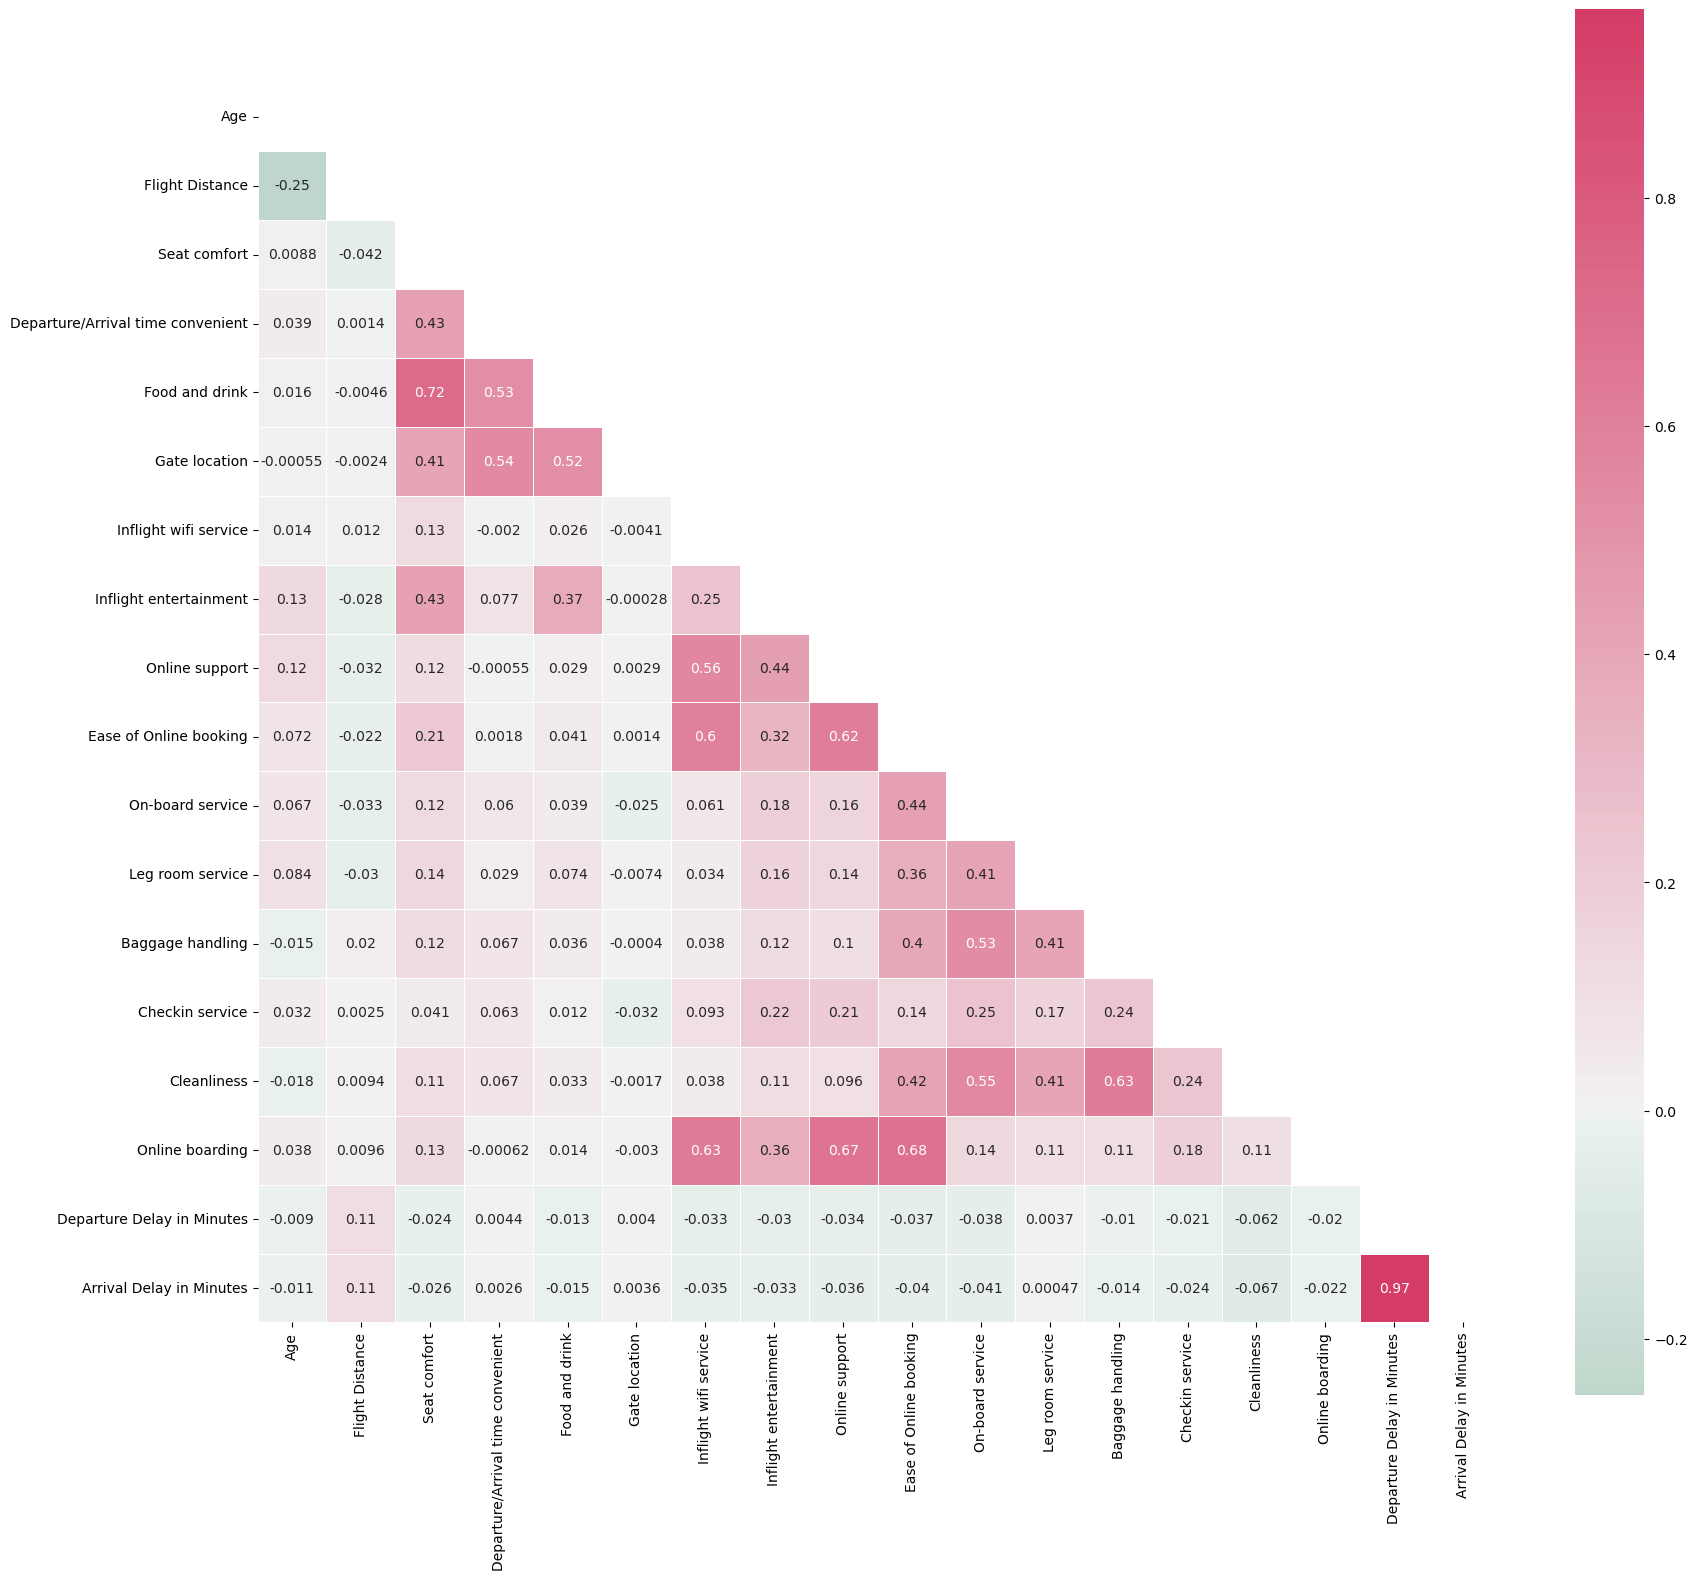

In [20]:
#Correlation among Features
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

<AxesSubplot: title={'center': 'Correlation Heatmap'}>

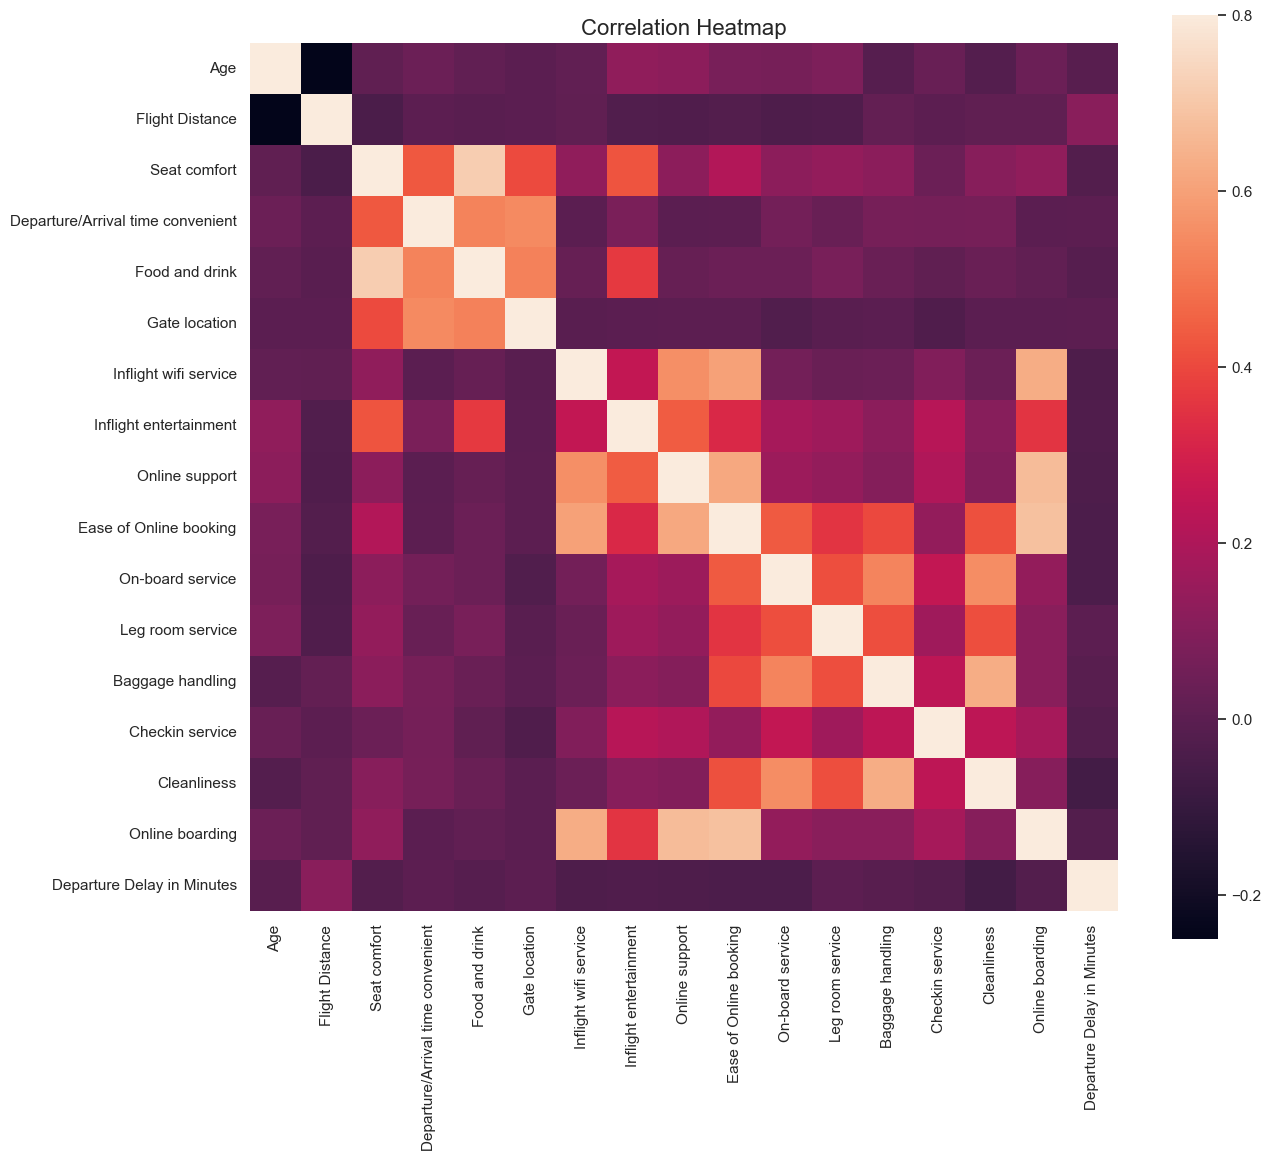

In [108]:
#Correlation Heat Map 
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation Heatmap',y=1,size=16)
sns.heatmap(correlation_departure,square = True,  vmax=0.8)

Index(['Departure Delay in Minutes', 'Flight Distance',
       'Departure/Arrival time convenient', 'Gate location',
       'Leg room service', 'Age', 'Baggage handling', 'Food and drink',
       'Online boarding', 'Checkin service', 'Seat comfort',
       'Inflight entertainment', 'Inflight wifi service', 'Online support',
       'Ease of Online booking', 'On-board service', 'Cleanliness'],
      dtype='object')


<AxesSubplot: >

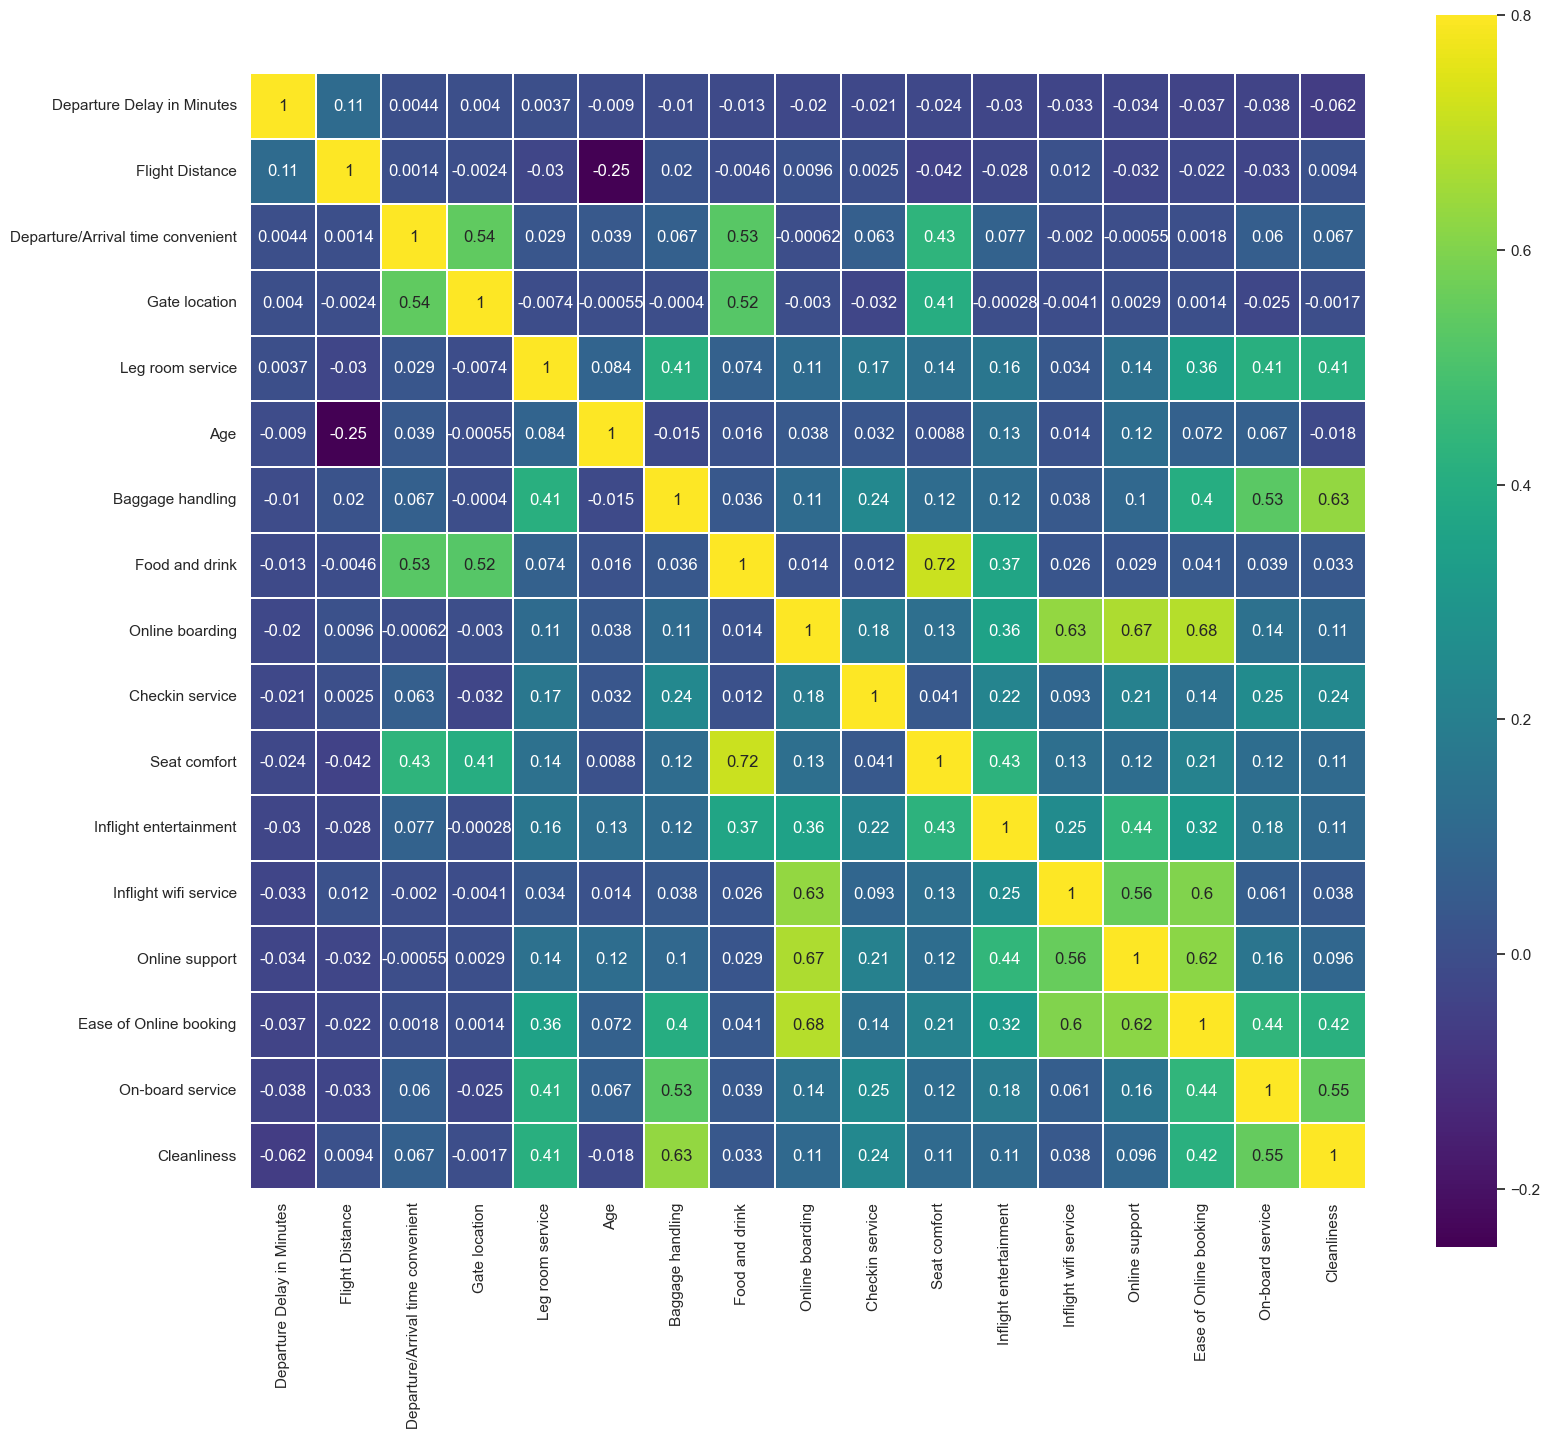

In [103]:
#Zoomed HeatMap
# Departure Delay Correlation Matrix 
k= 19
cols = correlation.nlargest(k,'Departure Delay in Minutes')['Departure Delay in Minutes'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (18,16))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

<p> As Arrival Delay in Minutes and Departure minutes are highly correlated (almost 1) we will drop one of them to avoid multicolinearity </p>

In [21]:
df = df.drop("Arrival Delay in Minutes", axis = 1 )

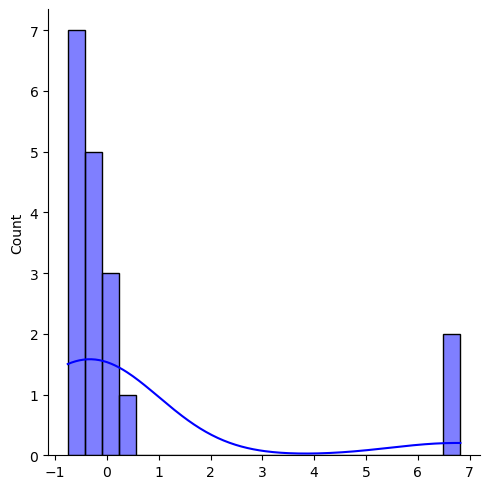

In [22]:
sns.displot(numeric_features.skew(),color='blue',kde=True,kind="hist")

<Figure size 1200x800 with 0 Axes>

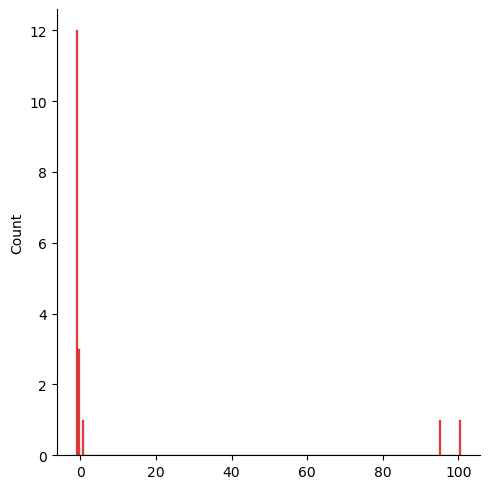

In [23]:
plt.figure(figsize = (12,8))
sns.displot(numeric_features.kurt(),color='r')
plt.show()

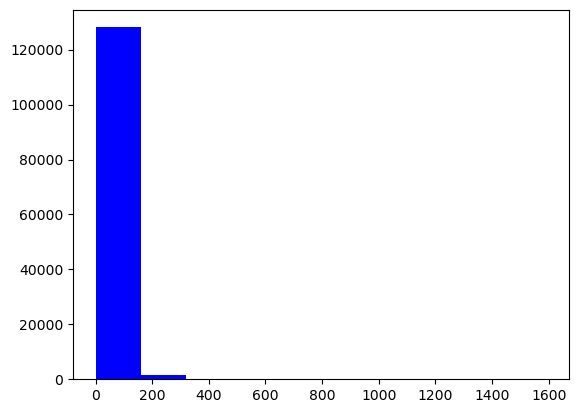

In [24]:
plt.hist(df['Departure Delay in Minutes'], orientation='vertical', histtype = 'bar', color= 'blue')
plt.show()

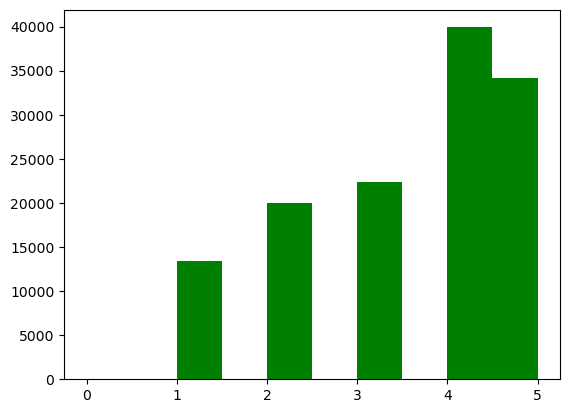

In [25]:
plt.hist(df['Ease of Online booking'], orientation='vertical', histtype = 'bar', color= 'green')
plt.show()

In [27]:
#Finding correlation coefficients between numeric features and Flight Distance 
correlation = numeric_features.corr()
print(correlation['Flight Distance'].sort_values(ascending = False),'\n')

Flight Distance                      1.000000
Departure Delay in Minutes           0.112555
Arrival Delay in Minutes             0.110103
Baggage handling                     0.019768
Inflight wifi service                0.012230
Online boarding                      0.009604
Cleanliness                          0.009432
Checkin service                      0.002456
Departure/Arrival time convenient    0.001350
Gate location                       -0.002409
Food and drink                      -0.004649
Ease of Online booking              -0.022299
Inflight entertainment              -0.027542
Leg room service                    -0.030316
Online support                      -0.032022
On-board service                    -0.032559
Seat comfort                        -0.042409
Age                                 -0.249625
Name: Flight Distance, dtype: float64 



In [29]:
#Observations

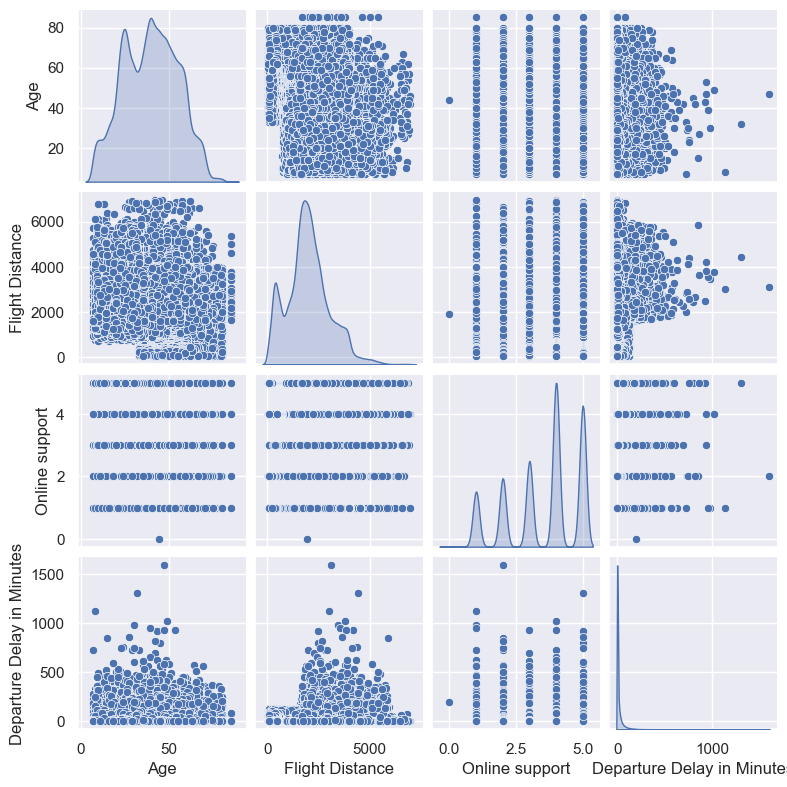

In [30]:
#Pair Plot
# Pair Plot between 'Departure Delay' and correlated variables

sns.set()
columns= ['Age', 'Flight Distance', 'Online support','Departure Delay in Minutes']
sns.pairplot(df[columns],height = 2, kind='scatter', diag_kind= 'kde')
plt.show()

In [31]:
#How Many People is Satisfied and Dissatisfied?
fig=px.pie(df,values=df["satisfaction"].value_counts(),names=["Satisfied","Dissatisfied"], title="<b>Satisfied And Dissatisfied Ratio",hole=.72, color_discrete_sequence = px.colors.qualitative.Pastel, template="plotly")
fig.update_layout(title_font_size=30)
fig.show()

In [32]:
#Satisfaction by Gender
fig= px.histogram(df,x="Gender", facet_col="satisfaction", color= "satisfaction", color_discrete_sequence= px.colors.qualitative.Alphabet)
fig.update_layout(title="<b>"+"Gender satisfaction", title_font_size= 18, font_size=14, title_x = 0.5, hoverlabel_font_size =20, template= "plotly")
fig.show()

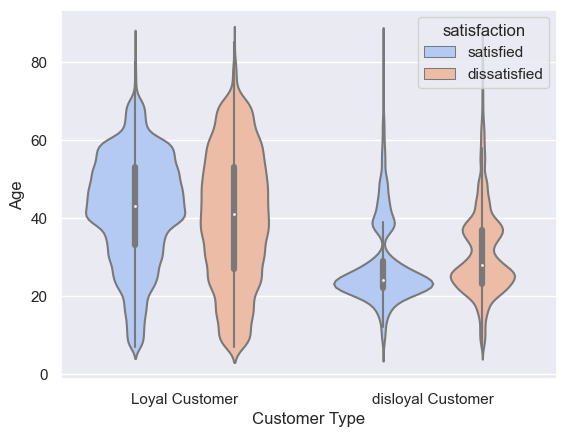

In [33]:
ax = sns.violinplot(x="Customer Type", y="Age", hue="satisfaction", data=df,palette="coolwarm")

In [34]:
fig1 = px.sunburst(df, path=["Customer Type","satisfaction"],template="plotly")
fig1.show()

Loyal customer has more dissatisfied customers

In [35]:
#Let's check now which class has the more satisfaction/disatisfaction
fig2 = px.sunburst(df,path=["Class","satisfaction"],template="plotly_white")
fig2.show()

<p>Eco Class has more dissatisified customers
Most dissatisfied customer is loyal customers and in Eco class</p>

<AxesSubplot: xlabel='Class', ylabel='Count'>

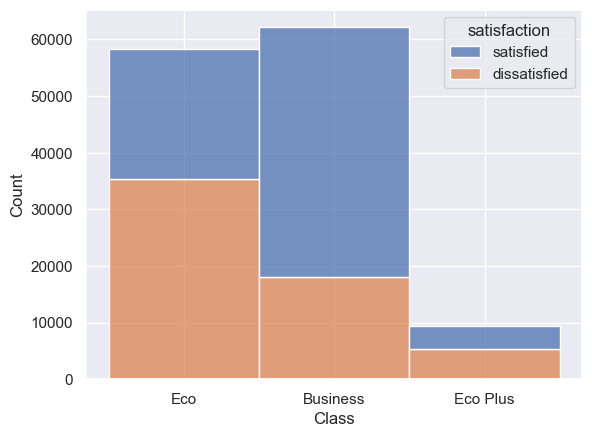

In [36]:
sns.histplot(data=df,x="Class",hue="satisfaction",multiple="stack")

<AxesSubplot: xlabel='Flight Distance', ylabel='Count'>

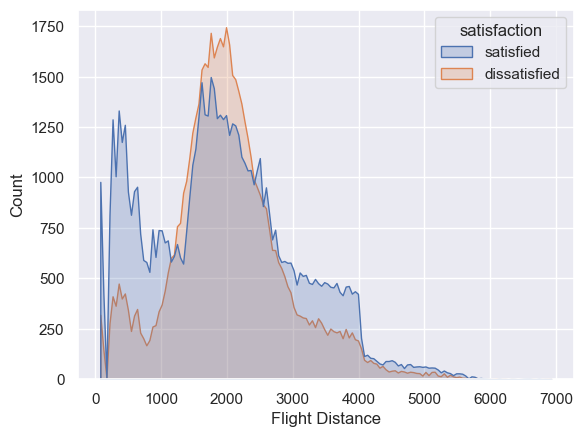

In [37]:
#Does the travel distance affects the satisfaction?
sns.histplot(data=df,x="Flight Distance",hue="satisfaction",element="poly")

<AxesSubplot: xlabel='Departure/Arrival time convenient', ylabel='Count'>

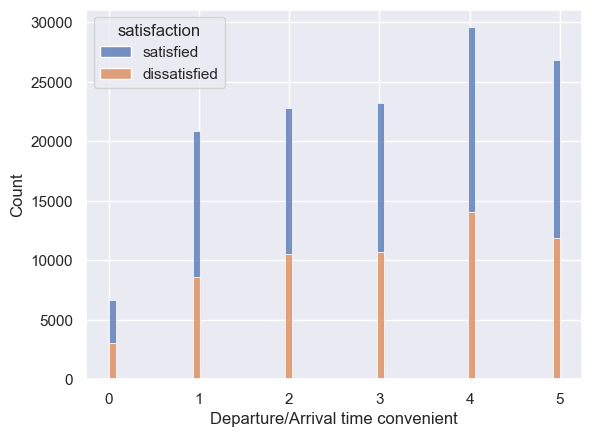

In [38]:
sns.histplot(data=df,x="Departure/Arrival time convenient",hue="satisfaction",multiple="stack")

<AxesSubplot: xlabel='satisfaction', ylabel='Flight Distance'>

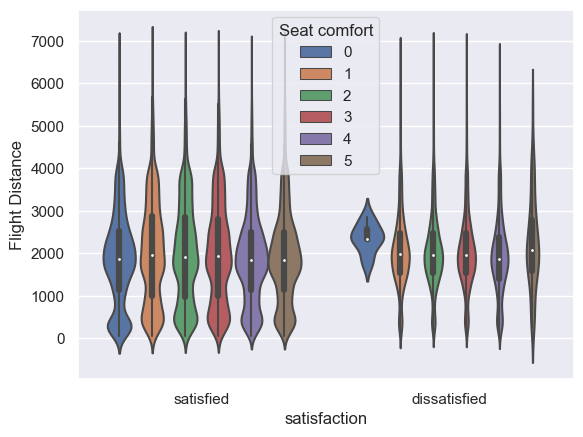

In [39]:
sns.violinplot(data=df, x="satisfaction",y="Flight Distance",hue="Seat comfort")

<AxesSubplot: xlabel='satisfaction', ylabel='Flight Distance'>

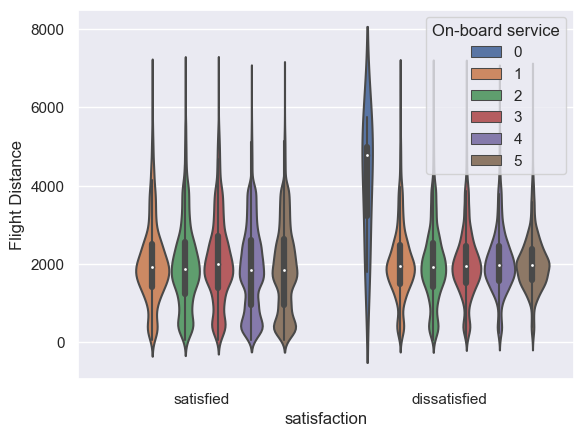

In [40]:
sns.violinplot(data=df, x="satisfaction",y="Flight Distance",hue="On-board service")

<AxesSubplot: xlabel='satisfaction', ylabel='Flight Distance'>

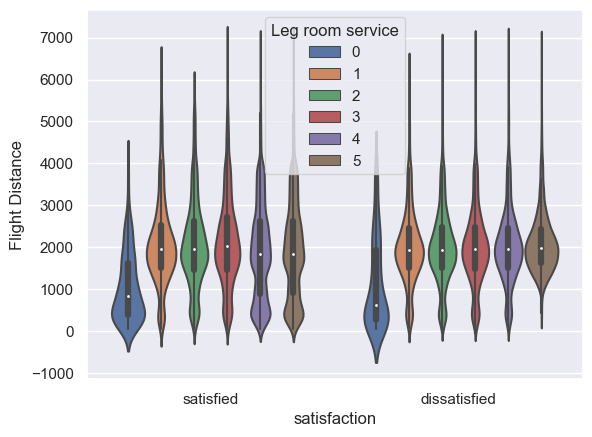

In [41]:
sns.violinplot(data=df, x="satisfaction",y="Flight Distance",hue="Leg room service")

<AxesSubplot: xlabel='On-board service', ylabel='Age'>

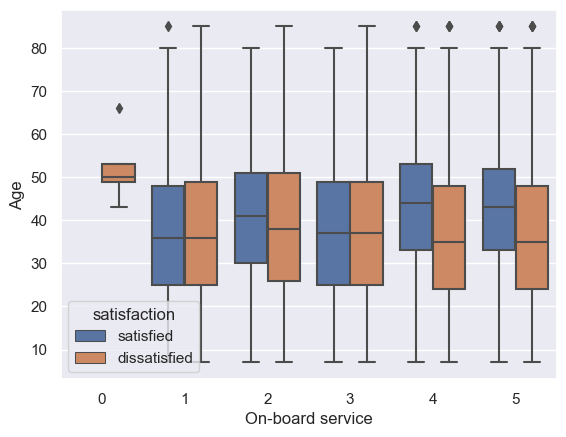

In [42]:
sns.boxplot(data=df, x="On-board service", y="Age", hue="satisfaction")

<AxesSubplot: xlabel='Food and drink', ylabel='Age'>

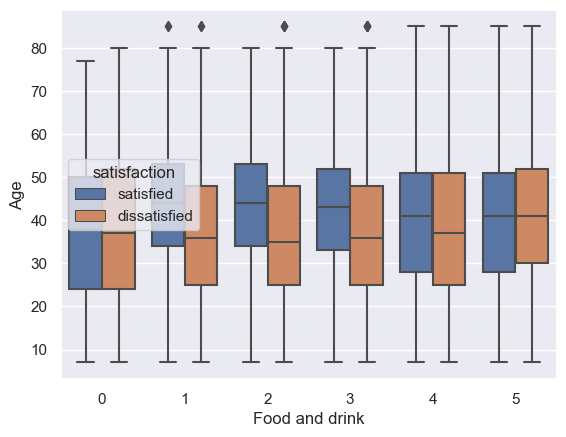

In [43]:
sns.boxplot(data=df, x="Food and drink", y="Age", hue="satisfaction")

<AxesSubplot: xlabel='Ease of Online booking', ylabel='Age'>

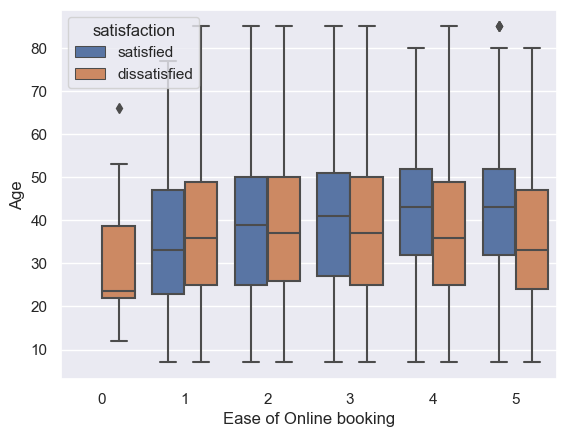

In [44]:
sns.boxplot(data=df, x="Ease of Online booking", y="Age", hue="satisfaction")

<AxesSubplot: xlabel='Cleanliness', ylabel='Age'>

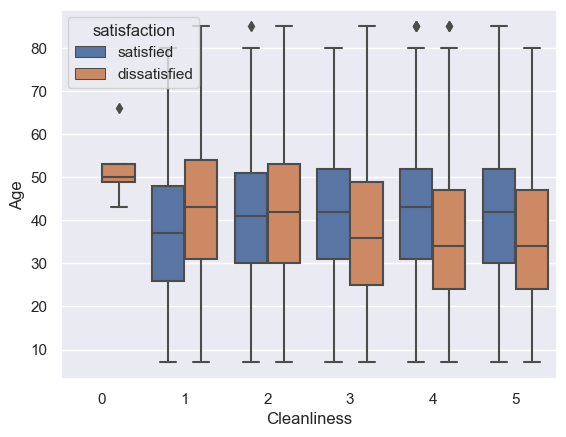

In [45]:
sns.boxplot(data=df, x="Cleanliness", y="Age", hue="satisfaction")

In [46]:
x_pred_col = ['Departure/Arrival time convenient','Inflight wifi service', 'Online support',
       'Ease of Online booking', 'On-board service', 'Checkin service', 'Cleanliness',
       'Food and drink']

In [47]:
def create_plot(df,x_column):
    _df_plot = df.groupby([x_column,'satisfaction']).size() \
    .reset_index().pivot(columns='satisfaction', index=x_column, values=0)
    return _df_plot

/var/folders/8r/1rwtjmt1489bxf0kzr5g5s300000gn/T/ipykernel_29283/3811457374.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



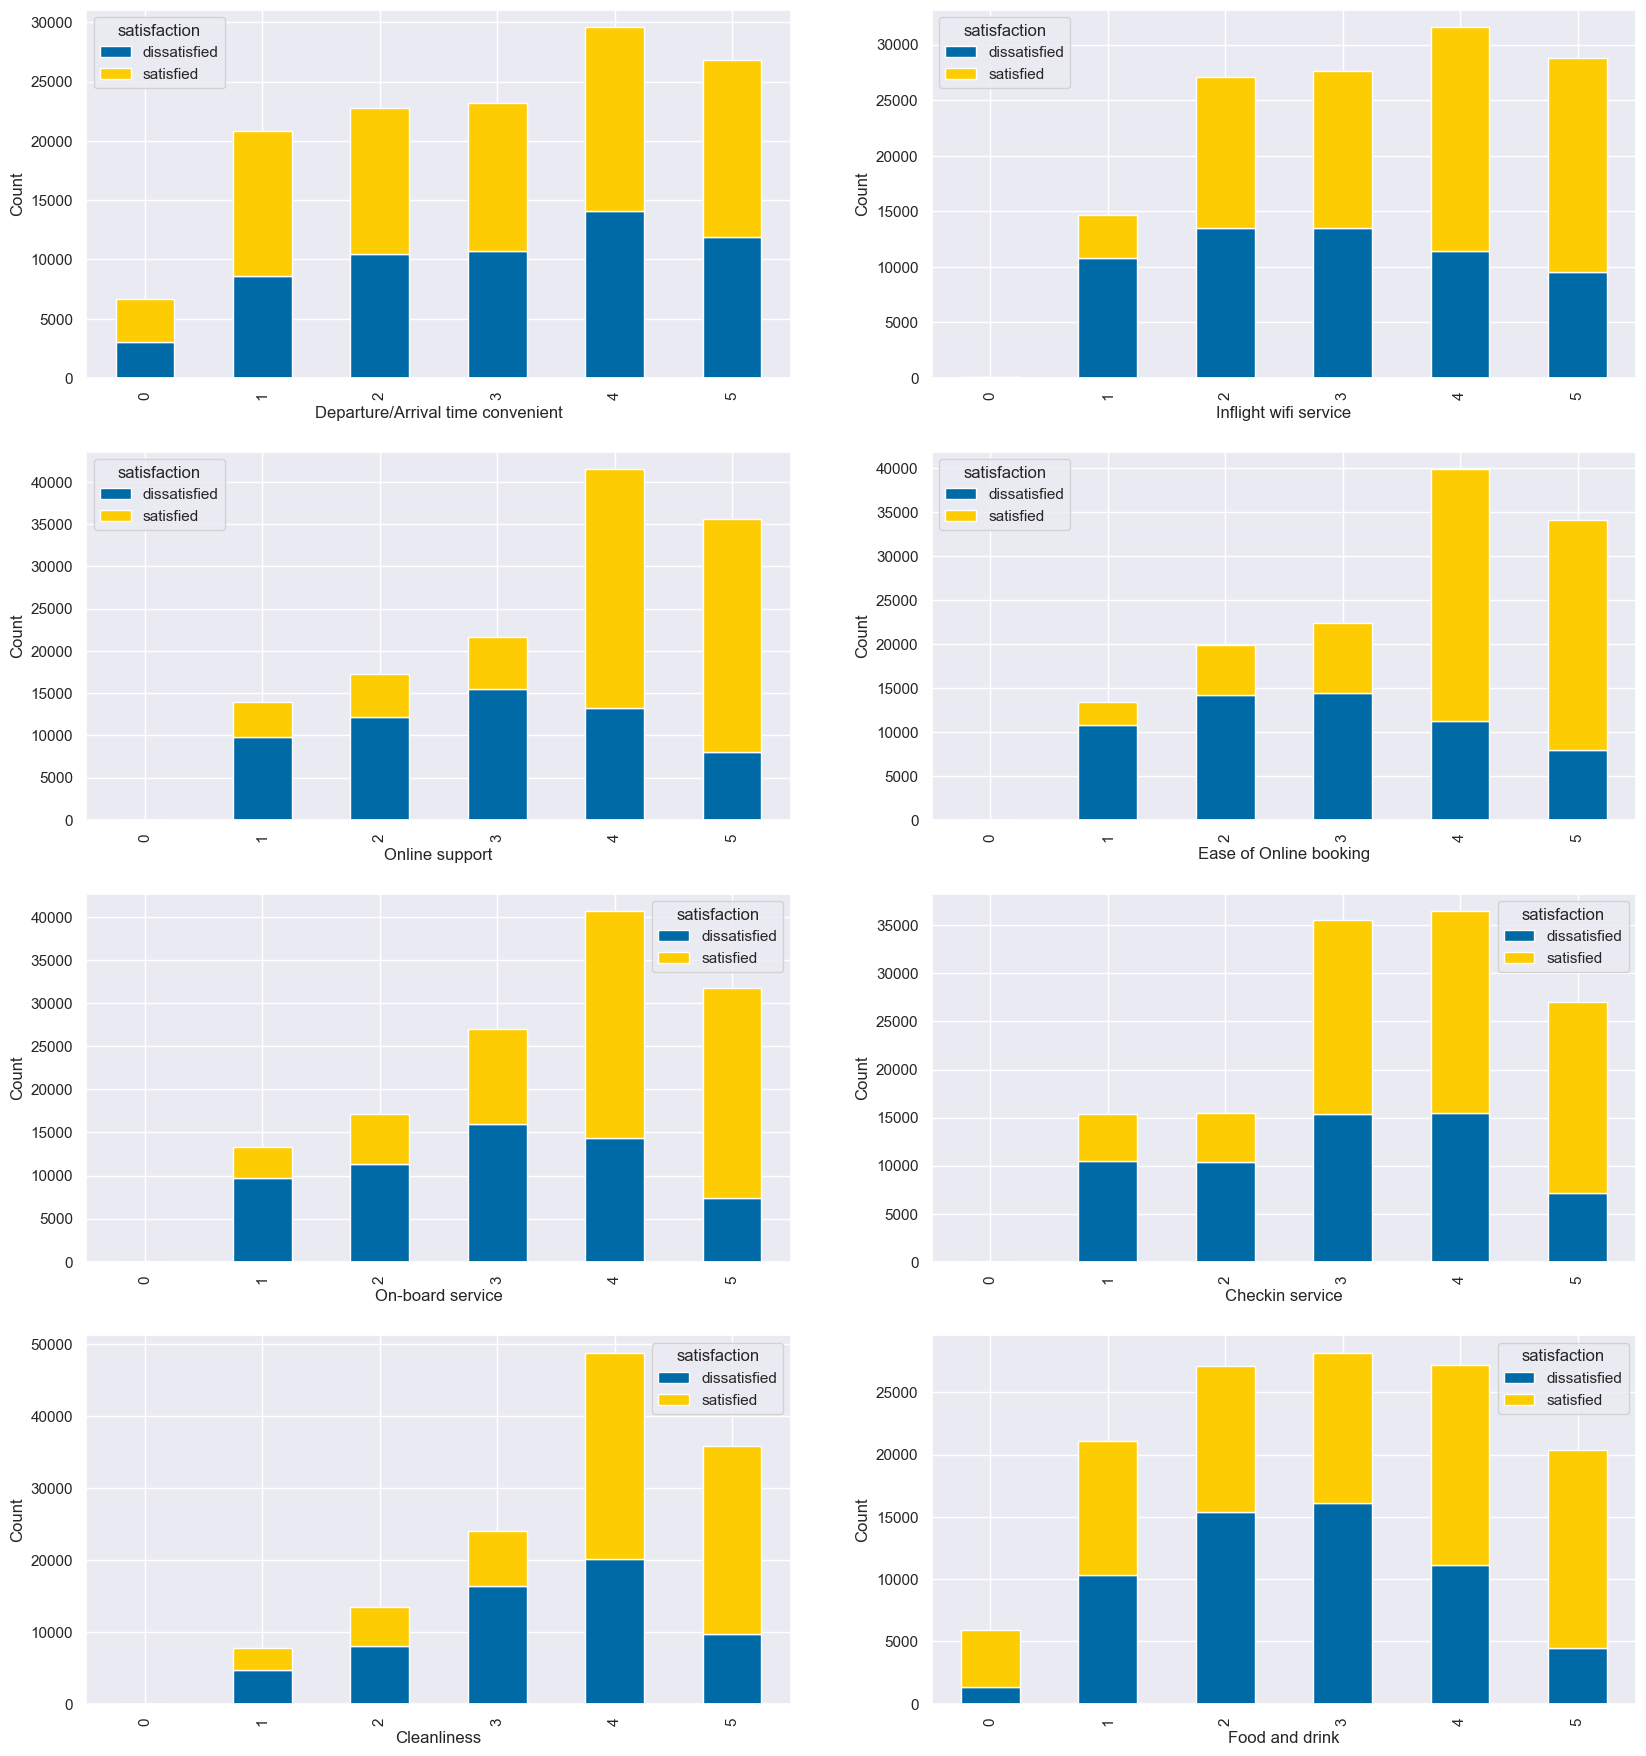

In [48]:
fig, ax = plt.subplots(4,2, figsize=(20,22))
axe = ax.ravel()

for i in range(0,8):
    create_plot(df, x_pred_col[i]).plot(kind='bar', stacked=True, ax=axe[i],color=["#006AA7","#FECC02"])
    plt.xlabel(x_pred_col[i])
    axe[i].set_ylabel('Count')
fig.show()

<h2><center>Preprocessing</h2>

In [74]:
#Encoding for categorical features
for i in df.select_dtypes(include=['object']):
    le= LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [75]:
print(df)

        satisfaction  Gender  Customer Type  Age  Type of Travel  Class  \
0                  1       0              0   65               1      1   
1                  1       1              0   47               1      0   
2                  1       0              0   15               1      1   
3                  1       0              0   60               1      1   
4                  1       0              0   70               1      1   
...              ...     ...            ...  ...             ...    ...   
129875             1       0              1   29               1      1   
129876             0       1              1   63               1      0   
129877             0       1              1   69               1      1   
129878             0       1              1   66               1      1   
129879             0       0              1   38               1      1   

        Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0                   265

In [64]:
#Remove the outliers from all the columns

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [65]:
# create an empty list to store the output indices from multiple columns

index_list = []
for feature in ['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service','Leg room service',
       'Baggage handling', 'Checkin service',
       'Cleanliness', 'Departure Delay in Minutes']:
    index_list.extend(outliers(df,feature))

In [66]:
# define a function called "remove" which returns a cleaned dataframe without outliers
def remove (df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [77]:
df = remove(df, index_list)

In [78]:
df.describe()

satisfaction        Gender  Customer Type           Age  \
count  88562.000000  88562.000000   88562.000000  88562.000000   
mean       0.616912      0.483029       0.175651     39.983232   
std        0.486142      0.499715       0.380525     15.022416   
min        0.000000      0.000000       0.000000      7.000000   
25%        0.000000      0.000000       0.000000     28.000000   
50%        1.000000      0.000000       0.000000     41.000000   
75%        1.000000      1.000000       0.000000     51.000000   
max        1.000000      1.000000       1.000000     85.000000   

       Type of Travel         Class  Flight Distance  Seat comfort  \
count    88562.000000  88562.000000     88562.000000  88562.000000   
mean         0.323039      0.551636      1906.320973      2.892493   
std          0.467640      0.613680       957.434656      1.406750   
min          0.000000      0.000000        50.000000      0.000000   
25%          0.000000      0.000000      1296.000000      2.000000   
50%          0.000000      0.000000      1886.000000      3.000000   
75%          1.000000      1.000000      2495.000000      4.000000   
max          1.000000      2.000000      4321.000000      5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                       88562.000000    88562.000000   88562.000000   
mean                            3.036833        2.872598       2.970326   
std                             1.539107        1.448754       1.322552   
min                             0.000000        0.000000       1.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight wifi service  Inflight entertainment  Online support  \
count           88562.000000            88562.000000    88562.000000   
mean                3.292642                3.506176        3.626183   
std                 1.302943                1.337221        1.289939   
min                 0.000000                0.000000        1.000000   
25%                 2.000000                3.000000        3.000000   
50%                 3.000000                4.000000        4.000000   
75%                 4.000000                5.000000        5.000000   
max                 5.000000                5.000000        5.000000   

       Ease of Online booking  On-board service  Leg room service  \
count            88562.000000      88562.000000      88562.000000   
mean                 3.612068          3.811827          3.631320   
std                  1.242078          0.994021          1.216641   
min                  0.000000          2.000000          0.000000   
25%                  3.000000          3.000000          3.000000   
50%                  4.000000          4.000000          4.000000   
75%                  5.000000          5.000000          5.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service   Cleanliness  Online boarding  \
count      88562.000000     88562.000000  88562.000000     88562.000000   
mean           3.881845         3.703789      3.906980         3.437761   
std            1.061759         0.971463      1.043437         1.273460   
min            1.000000         2.000000      1.000000         0.000000   
25%            3.000000         3.000000      3.000000         3.000000   
50%            4.000000         4.000000      4.000000         4.000000   
75%            5.000000         5.000000      5.000000         4.000000   
max            5.000000         5.000000      5.000000         5.000000   

       Departure Delay in Minutes  
count                88562.000000  
mean                     3.701170  
std                      7.030675  
min           

<h2><center>  Feature Selection </h2> 

In [79]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df_outliers_removed)
modified_data = pd.DataFrame(r_scaler.transform(df_outliers_removed), columns=df_outliers_removed.columns)
modified_data.head()

ValueError: could not convert string to float: 'satisfied'

In [60]:
from sklearn.feature_selection import SelectKBest, chi2 
X = modified_data.loc[:,modified_data.columns!='Gate location'] 
y = modified_data[['Gate location']] 
selector = SelectKBest(chi2, k=10) 
selector.fit(X, y) 
X_new = selector.transform(X) 
print(X.columns[selector.get_support(indices=True)])

ValueError: Unknown label type: (array([[0.4],
       [0.6],
       [0.6],
       ...,
       [0.6],
       [0.4],
       [0.6]]),)

In [80]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = numeric_features.drop('satisfaction', axis=1)
y = numeric_features['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

KeyError: "['satisfaction'] not found in axis"